In [1]:
# preface
#In this project i will analyze the data of e-commerce crm analytics merchant such as Amazon 
#here are the pre-project context:-
   # 1- data set is about e-commerce crm analytics 
   # 2- type of analysis used is (descreptive/diagnostic)
   # 3- what are the questions about the project ??
    #  (what are the most sold products
     # , from which products are the most revenue 
      #, what are the most countries purchased from us  
      #, from which country are the most revenue
      #, what is the ordering months trend
      #, what is the ordering hours trend,..etc)
      #here are the steps i made in this project
# i got the dataset from kaggle (https://www.kaggle.com/code/sercanyesiloz/crm-analytics/input)
# used pandas for data manipulation and cleaning ( discussed in the code )
# finally get the insights in a cummulative report
# the data set meta data are :-
#1- file size +44 mbyte
#2- 8 columns , 541909 rows
#3- data ingeneral expressing the product(stock,price) , country of ordering , dates , customers_id


# importing_libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

# data_wrangling

In [3]:
df = pd.read_csv(r"E:\ecommerce_dataset\data.csv", encoding='unicode_escape',index_col=[0],parse_dates=["InvoiceDate"]) # on premises

# data_inspection

In [4]:
df.shape

(541909, 7)

In [5]:
df.head(10)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom


In [6]:
df.columns   # there are some columns should be renamed

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country'],
      dtype='object')

In [7]:
df=df.rename(columns={'StockCode':"Stock_Code", 'InvoiceDate':"Invoice_Date", 'UnitPrice':"Unit_Price", 'CustomerID':"Customer_ID"})
# renaming columns in order to effectively analyze it

In [8]:
df.describe()   # as we see here there is negative values , so i will deep dive analyze it separately

,Quantity,Unit_Price,Customer_ID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [9]:
df = df.astype({"Customer_ID": str})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Stock_Code    541909 non-null  object        
 1   Description   540455 non-null  object        
 2   Quantity      541909 non-null  int64         
 3   Invoice_Date  541909 non-null  datetime64[ns]
 4   Unit_Price    541909 non-null  float64       
 5   Customer_ID   541909 non-null  object        
 6   Country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
# splitting the date column

In [12]:
df['day'] = df['Invoice_Date'].dt.day
df['month'] = df['Invoice_Date'].dt.month
df['year'] = df['Invoice_Date'].dt.year
df['hour'] = df['Invoice_Date'].dt.hour

In [13]:
df.head()  # check dataframe again to inspect updates above

,Stock_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,day,month,year,hour
InvoiceNo,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,8
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,8
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8


In [14]:
df.isnull().sum(axis=0) # inspect nulls

Stock_Code         0
Description     1454
Quantity           0
Invoice_Date       0
Unit_Price         0
Customer_ID        0
Country            0
day                0
month              0
year               0
hour               0
dtype: int64

# dealing_with_duplicates

# inspect_duplicates and make a csv file for them then drop it

In [15]:
duplicates=df[df.duplicated(keep=False)]

In [16]:
#duplicates.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/E-Commerce_EDA/dplicates.csv")

In [17]:
df.drop_duplicates(keep="first",inplace=True)  # drop duplicates

In [18]:
df.shape #check

(536061, 11)

# Let's see the outliers before analysis

## Anlyzing Outliers  ( boxplot is the best way to inspect outliers )

## 1- Quantity_Outliers

### before removing outliers

In [19]:
# Find the 75th and 25th percentiles
Quantity_seventy_fifth = df["Quantity"].quantile(.75)
Quantity_twenty_fifth = df["Quantity"].quantile(.25)

# Calculate iqr
Quantity_iqr = Quantity_seventy_fifth - Quantity_twenty_fifth

# Calculate the thresholds
upper = Quantity_seventy_fifth + (1.5 * Quantity_iqr)
lower = Quantity_twenty_fifth - (1.5 * Quantity_iqr)

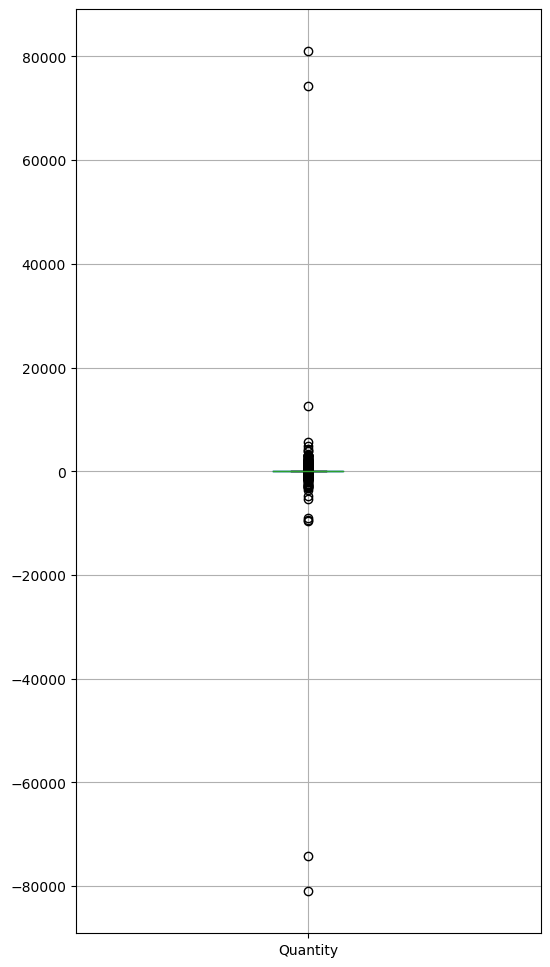

In [20]:
plt.figure(figsize = (6,12))   
df.boxplot("Quantity")
plt.show()

In [21]:
quantity_outliers = df[(df["Quantity"] < lower) | (df["Quantity"] > upper)]

In [22]:
quantity_outliers.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/E-Commerce_EDA/quantity_outliers.csv")

In [23]:
quantity_outliers["Stock_Code"].value_counts() # products and their outliers

21212           730
84077           468
22197           427
21977           407
84879           399
               ... 
47344B            1
84921             1
gift_0001_30      1
gift_0001_10      1
21358             1
Name: Stock_Code, Length: 2765, dtype: int64

### after removing outliers

In [24]:
# Subset the data
quantity_without_outliers = df[(df["Quantity"] > lower) & (df["Quantity"] < upper)]
quantity_without_outliers.head()
quantity_without_outliers["Quantity"].describe()

count   477565.00
mean         4.61
std          4.56
min        -12.00
25%          1.00
50%          3.00
75%          6.00
max         23.00
Name: Quantity, dtype: float64

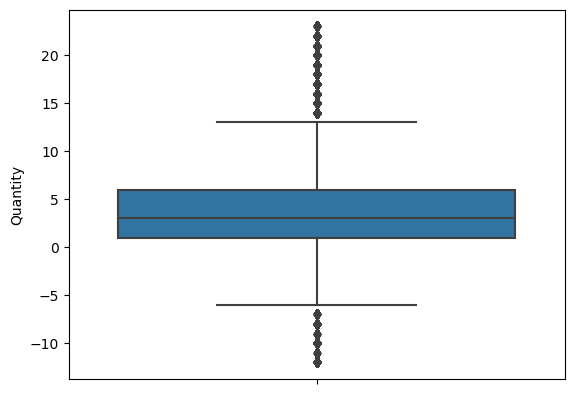

In [25]:
sns.boxplot(data=quantity_without_outliers,y="Quantity")
plt.show()

## 2- Unitprice_Outliers

### before removing outliers

In [26]:
# Find the 75th and 25th percentiles
Unit_Price_seventy_fifth = df["Unit_Price"].quantile(0.80)
Unit_Price_twenty_fifth = df["Unit_Price"].quantile(0.25)

# Calculate iqr
Unit_Price_iqr = Unit_Price_seventy_fifth - Unit_Price_twenty_fifth

# Calculate the thresholds
upper = Unit_Price_seventy_fifth + (1.5 * Unit_Price_iqr)
lower = Unit_Price_twenty_fifth - (1.5 * Unit_Price_iqr)

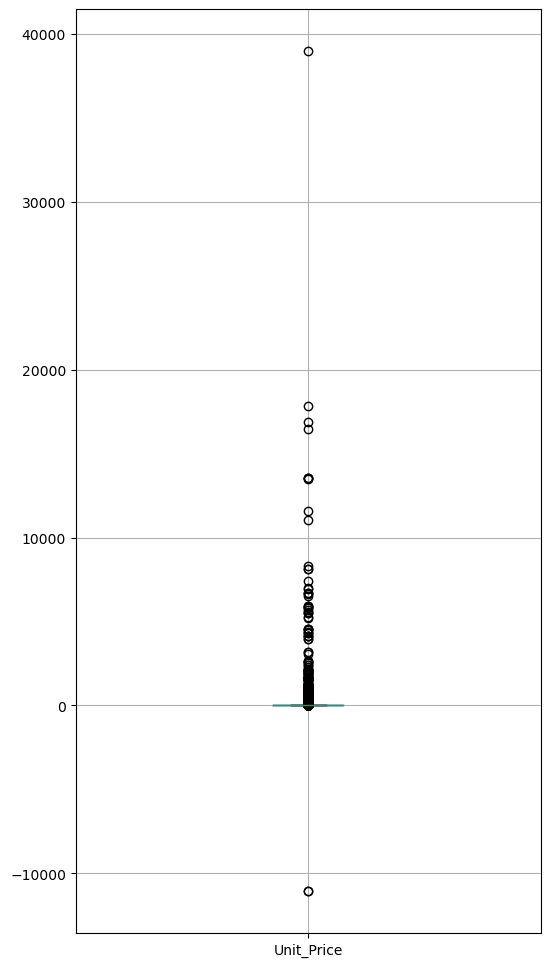

In [27]:
plt.figure(figsize = (6,12))
df.boxplot("Unit_Price")
plt.show()

In [28]:
unitprice_outliers = df[(df["Unit_Price"] < lower) | (df["Unit_Price"] > upper)]

In [29]:
unitprice_outliers.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/E-Commerce_EDA/unitprice_outliers.csv")

### after removing outliers

In [30]:
# Subset the data
Unit_Price_without_outliers = df[(df["Unit_Price"] > lower) & (df["Unit_Price"] < upper)]
Unit_Price_without_outliers.head()
Unit_Price_without_outliers["Unit_Price"].describe()

count   511479.00
mean         2.72
std          2.20
min          0.00
25%          1.25
50%          2.08
75%          3.75
max         10.40
Name: Unit_Price, dtype: float64

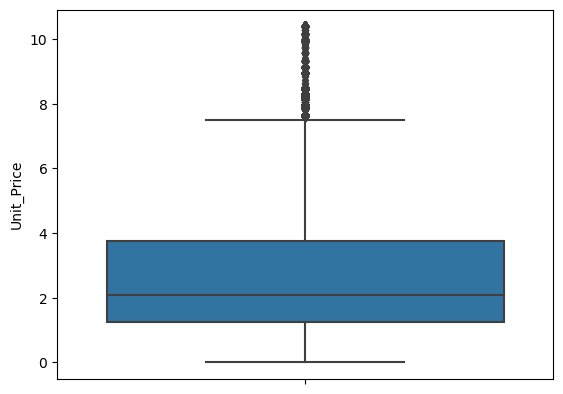

In [31]:
sns.boxplot(data=Unit_Price_without_outliers,y="Unit_Price")
plt.show()

# creating clean dataframe

In [32]:
df.head()

,Stock_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,day,month,year,hour
InvoiceNo,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,8
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,8
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8


In [36]:
df["Revenue"]=df["Quantity"]*df["Unit_Price"] # make anew column with revenue 

In [37]:
df.head()

,Stock_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,day,month,year,hour,Revenue
InvoiceNo,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,8,15.30
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,8,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8,20.34


In [38]:
df.describe()

,Quantity,Unit_Price,day,month,year,hour,Revenue
count,536061.00,536061.00,536061.00,536061.00,536061.00,536061.00,536061.00
mean,9.65,4.63,15.03,7.55,2010.92,13.08,18.13
std,218.86,97.29,8.66,3.51,0.27,2.45,380.86
min,-80995.00,-11062.06,1.00,1.00,2010.00,6.00,-168469.60
25%,1.00,1.25,7.00,5.00,2011.00,11.00,3.75
50%,3.00,2.08,15.00,8.00,2011.00,13.00,9.87
75%,10.00,4.13,22.00,11.00,2011.00,15.00,17.40
max,80995.00,38970.00,31.00,12.00,2011.00,20.00,168469.60


## lets make some insights

## what are sales revenue for years

In [39]:
df.groupby(["year"])[["Revenue"]].sum().sort_values(by="year",ascending=True)

,Revenue
year,
2010,745858.24
2011,8974529.62


### what are the top sales countries

In [40]:
df.groupby("Country")[["Quantity"]].sum().sort_values(by=["Quantity"],ascending=False)

,Quantity
Country,
United Kingdom,4258751
Netherlands,200128
EIRE,142495
Germany,117340
France,110438
Australia,83643
Sweden,35632
Switzerland,30313
Spain,26817


### what are the top revenue countries

In [43]:
df.groupby("Country")[["Revenue"]].sum().sort_values(by=["Revenue"],ascending=False)

,Revenue
Country,
United Kingdom,8161527.09
Netherlands,284661.54
EIRE,262993.38
Germany,221491.47
France,197317.11
Australia,137009.77
Switzerland,56363.05
Spain,54756.03
Belgium,40910.96


## what are the top sales products ( Quantity )

In [44]:
df.groupby(["Description","Stock_Code"])[["Quantity"]].sum().sort_values(by="Quantity",ascending=False)

,,Quantity
Description,Stock_Code,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,84077,53751
JUMBO BAG RED RETROSPOT,85099B,47238
POPCORN HOLDER,22197,36318
ASSORTED COLOUR BIRD ORNAMENT,84879,36282
PACK OF 72 RETROSPOT CAKE CASES,21212,36016
...,...,...
wrongly marked. 23343 in box,20713,-3100
"Unsaleable, destroyed.",79323W,-4830
throw away,72140F,-5368


## what are the top sales products ( Revenue )

In [45]:
df.groupby(["Description","Stock_Code"])[["Revenue"]].sum().sort_values(by="Revenue",ascending=False)

,,Revenue
Description,Stock_Code,
DOTCOM POSTAGE,DOT,206245.48
REGENCY CAKESTAND 3 TIER,22423,164459.49
PARTY BUNTING,47566,98234.56
WHITE HANGING HEART T-LIGHT HOLDER,85123A,97659.94
JUMBO BAG RED RETROSPOT,85099B,92084.93
...,...,...
Bank Charges,BANK CHARGES,-7175.64
CRUK Commission,CRUK,-7933.43
Adjust bad debt,B,-11062.06


## what are the lowest sales products ( Revenue )

In [46]:
df.groupby(["Description","Stock_Code"])[["Revenue"]].sum().sort_values(by="Revenue",ascending=True)

,,Revenue
Description,Stock_Code,
AMAZON FEE,AMAZONFEE,-221520.50
Manual,M,-69034.19
Adjust bad debt,B,-11062.06
CRUK Commission,CRUK,-7933.43
Bank Charges,BANK CHARGES,-7175.64
...,...,...
JUMBO BAG RED RETROSPOT,85099B,92084.93
WHITE HANGING HEART T-LIGHT HOLDER,85123A,97659.94
PARTY BUNTING,47566,98234.56


## what are the lowest sales products ( Quantity )

In [47]:
df.groupby(["Description","Stock_Code"])[["Quantity"]].sum().sort_values(by="Quantity",ascending=True)

,,Quantity
Description,Stock_Code,
printing smudges/thrown away,23005,-9600
Printing smudges/thrown away,23003,-9058
throw away,72140F,-5368
"Unsaleable, destroyed.",79323W,-4830
wrongly marked. 23343 in box,20713,-3100
...,...,...
PACK OF 72 RETROSPOT CAKE CASES,21212,36016
ASSORTED COLOUR BIRD ORNAMENT,84879,36282
POPCORN HOLDER,22197,36318


## which customers has the most (Quantity)

In [48]:
df.groupby(["Customer_ID"])[["Quantity"]].sum().sort_values(by="Quantity",ascending=False)

,Quantity
Customer_ID,
nan,278552
14646.0,196719
12415.0,77242
14911.0,77155
17450.0,69009
...,...
16252.0,-158
16742.0,-189
14213.0,-244


## which customers has the most (Revenue)

In [49]:
df.groupby(["Customer_ID"])[["Revenue"]].sum().sort_values(by="Revenue",ascending=False)

,Revenue
Customer_ID,
nan,1443316.28
14646.0,279489.02
18102.0,255522.49
17450.0,187322.17
14911.0,132458.73
...,...
12503.0,-1126.00
17603.0,-1165.30
14213.0,-1192.20


# lets make some visualiztion

## what is the distribution of hours ordering 

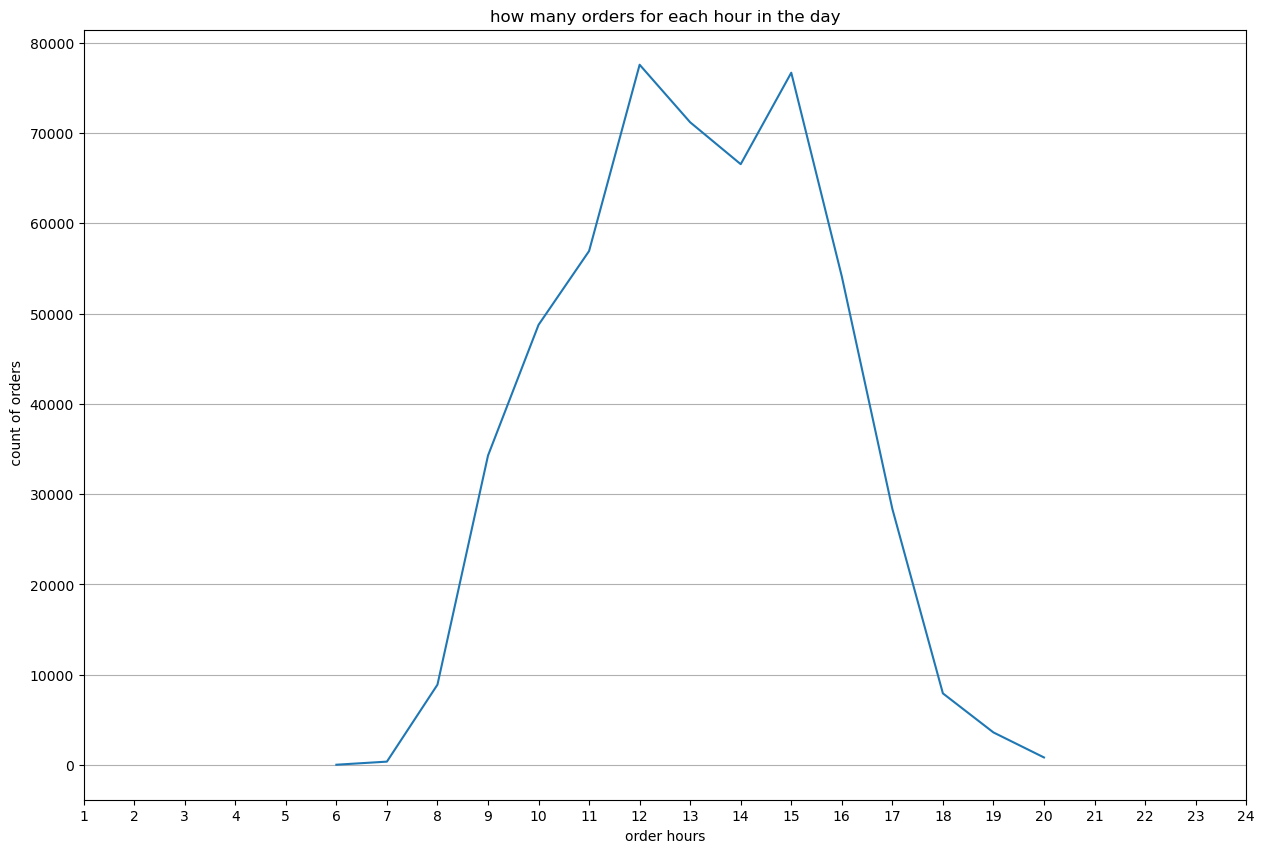

In [51]:
hours = [hour for hour , clean in df.groupby("hour")]
hours2=range(1,25)
plt.figure(figsize=(15,10))
plt.plot(hours,df.groupby("hour")["Quantity"].count())
plt.xticks(hours2)
plt.title("how many orders for each hour in the day")
plt.xlabel("order hours")
plt.ylabel(" count of orders")
plt.grid(axis="y")
plt.show()

## what is the distribution of month days ordering 

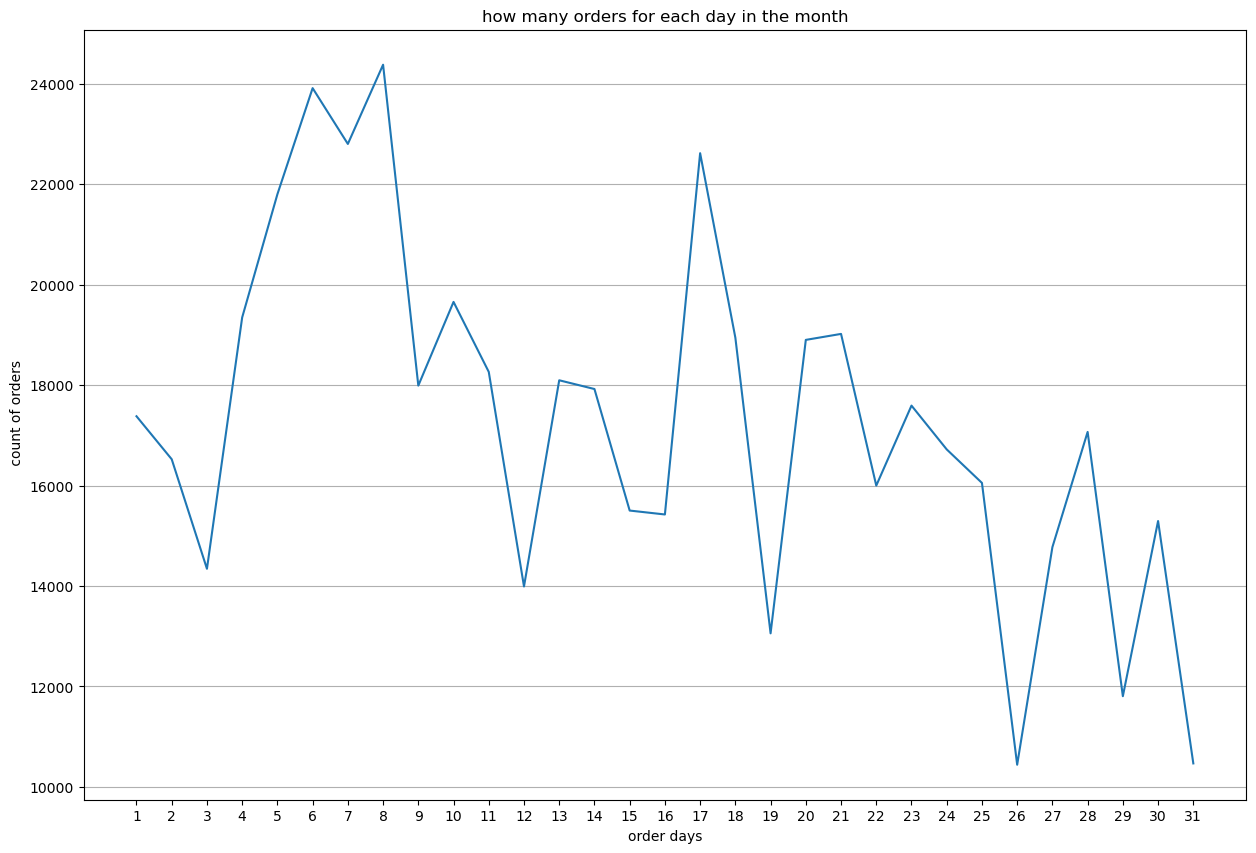

In [52]:
days = [day for day , clean in df.groupby("day")]

plt.figure(figsize=(15,10))
plt.plot(days,df.groupby("day")["Quantity"].count())
plt.xticks(days)
plt.xlabel("order days")
plt.ylabel(" count of orders")
plt.title("how many orders for each day in the month")
plt.grid(axis="y")
plt.show()

In [ ]:
sns.pairplot(data=df)
plt.show()

C:\Users\20114\AppData\Local\Temp\ipykernel_16208\1083294292.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x="month",y="Quantity",ci=None)


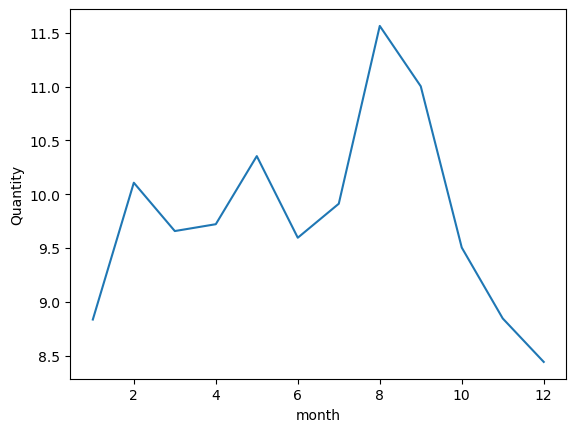

In [62]:
sns.lineplot(data=df,x="month",y="Quantity",ci=None)
plt.show()